## EDA and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../datasets/train.csv', keep_default_na=False, na_values='')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
train.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

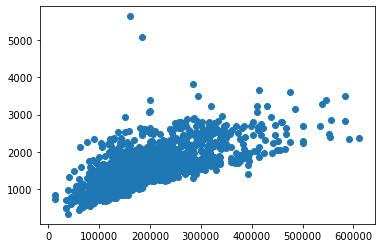

In [8]:
plt.scatter(train['SalePrice'], train['Gr Liv Area'])

In [9]:
train['Gr Liv Area'].sort_values(ascending=False)

960     5642
1885    5095
616     3820
1897    3672
1035    3608
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: Gr Liv Area, Length: 2051, dtype: int64

In [10]:
train.drop([960], inplace=True)

In [11]:
train.drop([1885], inplace=True)

**I dropped these two outliers - the houses that were in the 5000+ sqft range.**

In [12]:
train['Gr Liv Area'].sort_values(ascending=False)

616     3820
1897    3672
1035    3608
1692    3500
1939    3493
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: Gr Liv Area, Length: 2049, dtype: int64

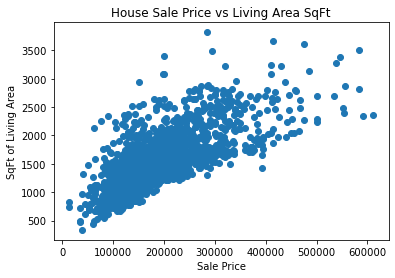

In [13]:
plt.scatter(train['SalePrice'], train['Gr Liv Area'])
plt.title('House Sale Price vs Living Area SqFt')
plt.xlabel('Sale Price')
plt.ylabel('SqFt of Living Area');

In [14]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [15]:
new_columns = {
    'Id':'id','PID':'pid','MS SubClass':'sub_class','MS Zoning':'zoning',
    'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area',
    'Street':'street', 'Alley':'alley', 'Lot Shape':'lot_shape',
    'Land Contour':'land_contour', 'Utilities':'utilities',
    'Lot Config':'lot_config', 'Land Slope':'land_slope',
    'Neighborhood':'neighborhood', 'Condition 1':'condition_1',
    'Condition 2':'condition_2', 'Bldg Type':'bldg_type', 
    'House Style':'house_style', 'Overall Qual':'overall_qual',
    'Overall Cond':'overall_cond', 'Year Built':'year_built',
    'Year Remod/Add':'year_remod_add', 'Roof Style':'roof_style',
    'Roof Matl':'roof_matl', 'Exterior 1st':'exterior_1st', 
    'Exterior 2nd':'exterior_2nd', 'Mas Vnr Type':'mas_vnr_type',
    'Mas Vnr Area':'mas_vnr_area', 'Exter Qual':'exterior_qual',
    'Exter Cond':'exterior_cond', 'Foundation':'foundation',
    'Bsmt Qual':'bsmt_qual','Bsmt Cond':'bsmt_cond', 
    'Bsmt Exposure':'bsmt_exposure', 'BsmtFin Type 1':'bsmt_fin_type1',
    'BsmtFin SF 1':'bsmt_fin_sqft1','BsmtFin Type 2':'bsmt_fin_type2',
    'BsmtFin SF 2':'bsmt_fin_sqft2', 'Bsmt Unf SF':'bsmt_unfin_sqft',
    'Total Bsmt SF':'total_bsmt_sqft','Heating':'heating', 
    'Heating QC':'heating_qc', 'Central Air':'central_air',
    'Electrical':'electrical', '1st Flr SF':'1st_flr_sqft',
    '2nd Flr SF':'2nd_flr_sqft', 'Low Qual Fin SF':'low_qual_fin_sqft',
    'Gr Liv Area':'gr_liv_area', 'Bsmt Full Bath':'bsmt_full_bath',
    'Bsmt Half Bath':'bsmt_half_bath', 'Full Bath':'full_bath', 
    'Half Bath':'half_bath', 'Bedroom AbvGr':'bedroom_abv_gr',
    'Kitchen AbvGr':'kitchen', 'Kitchen Qual':'kitchen_qual', 
    'TotRms AbvGrd':'tot_rms_abv_gr', 'Functional':'home_functional',
    'Fireplaces':'fireplaces', 'Fireplace Qu':'fireplace_qual',
    'Garage Type':'garage_type', 'Garage Yr Blt':'garage_year_built',
    'Garage Finish':'garage_finish', 'Garage Cars':'garage_cars',
    'Garage Area':'garage_area', 'Garage Qual':'garage_qual',
    'Garage Cond':'garage_cond', 'Paved Drive':'paved_drive', 
    'Wood Deck SF':'wood_deck_sqft', 'Open Porch SF':'open_porch_sqft',
    'Enclosed Porch':'enclosed_porch_sqft', '3Ssn Porch':'3ssn_porch_sqft',
    'Screen Porch':'screen_porch_sqft', 'Pool Area':'pool_sqft', 
    'Pool QC':'pool_qual','Fence':'fence', 'Misc Feature':'misc_feature',
    'Misc Val':'misc_value', 'Mo Sold':'month_sold', 'Yr Sold':'year_sold', 
    'Sale Type':'sale_type','SalePrice':'sale_price'
}

In [16]:
train.rename(columns=new_columns, inplace=True)

In [17]:
train.head()

,id,pid,sub_class,zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch_sqft,pool_sqft,pool_qual,fence,misc_feature,misc_value,month_sold,year_sold,sale_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


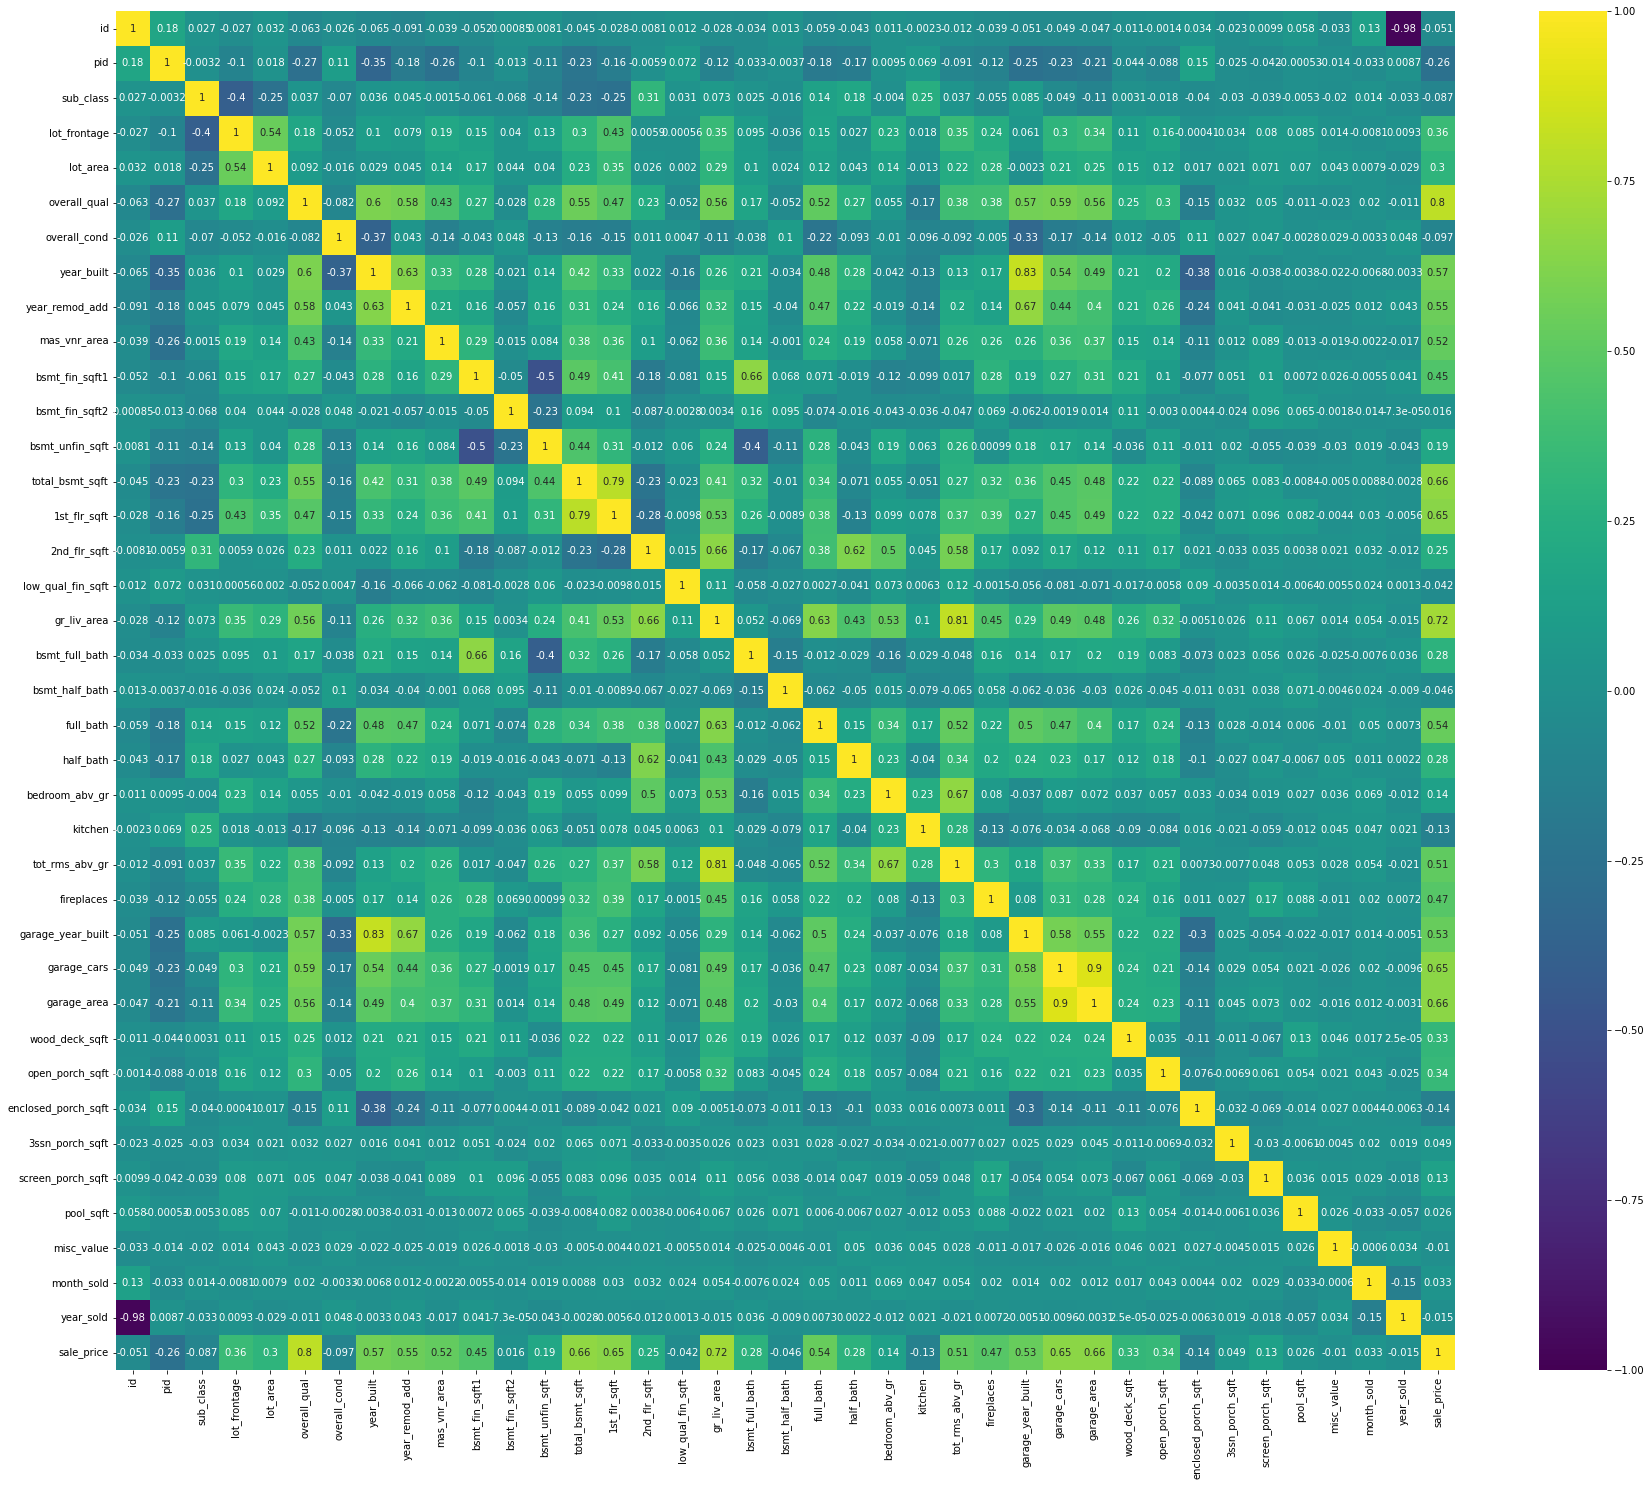

In [21]:
plt.figure(figsize=(30,25))
sns.heatmap(train.corr(), annot=True, vmin=-1, cmap='viridis');

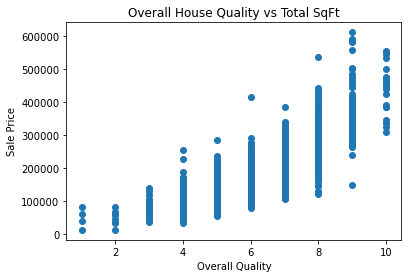

In [33]:
plt.scatter(x=train['overall_qual'], y=train['sale_price'])
plt.title('Overall House Quality vs Total SqFt')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');